In [11]:
import meep as mp
from meep.materials import Au
import numpy as np
import math
import matplotlib.pyplot as plt

resolution = 200  # pixels/μm

dpml = 1.0
sz = 10+2*dpml
cell_size = mp.Vector3(z=sz)
pml_layers = [mp.PML(dpml)]

wvl_min = 0.4
wvl_max = 0.8
fmin = 1/wvl_max
fmax = 1/wvl_min
fcen = 0.5*(fmax+fmin)
df = fmax-fmin
nfreq = 50

sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df), component=mp.Ex, center=mp.Vector3(z=-0.5*sz+dpml))]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    resolution=resolution)

refl_fr = mp.FluxRegion(center=mp.Vector3(z=-0.25*sz))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

empty_flux = mp.get_fluxes(refl)
empty_data = sim.get_flux_data(refl)
sim.reset_meep()

geometry = [mp.Sphere(0.0001*sz, center=mp.Vector3(z=0.25*sz), material=Au)]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    dimensions=1,
                    resolution=resolution)

refl = sim.add_flux(fcen, df, nfreq, refl_fr)
sim.load_minus_flux_data(refl, empty_data)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ex, mp.Vector3(), 1e-9))

refl_flux = mp.get_fluxes(refl)
R_meep = -1*np.divide(refl_flux,empty_flux)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000132084 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 200
time for set_epsilon = 0.000920057 s
-----------
field decay(t = 50.0025): 0.250189327739215 / 0.250189327739215 = 1.0
field decay(t = 100.0025): 4.358317244783321e-16 / 0.250189327739215 = 1.7420076564281815e-15
run 0 finished at t = 100.0025 (40001 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000130177 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 12 with resolution 200
     sphere, center = (0,0,3)
          radius 0.0012
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.000943899 s
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibil

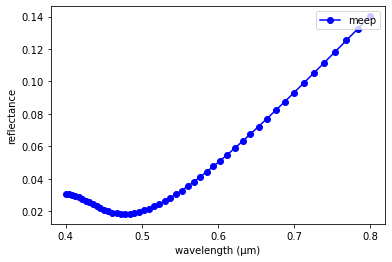

In [12]:
freqs = mp.get_flux_freqs(refl)
wvls = np.divide(1,freqs)

plt.figure()
plt.plot(wvls,R_meep,'bo-',label='meep')
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.xticks([t for t in np.arange(0.4,0.9,0.1)])
plt.legend(loc='upper right')
plt.show()